In [2]:
import numpy as np
import pandas as pd

In [25]:
#None으로 결측값을 표현할때
arr1=np.array([1,None,3,4])
print(arr1)
print(arr1.dtype)

[1 None 3 4]
object


In [26]:
#object객체이므로 연산을 호환하지않는다
arr.sum()

NameError: name 'arr' is not defined

In [27]:
#nan값으로 결측을 표현할때
arr3=np.array([1,np.nan,3,4])
print(arr3)
print(arr3.dtype)

[ 1. nan  3.  4.]
float64


In [28]:
#nan으로 표현하면 연산을 호환한다
#nan에대한 산술연산에서는 적어도 오류는 없다
print(1+np.nan)
print(arr3.sum())

nan
nan


In [24]:
#nan값을 무시하고 더해주는 메서드
np.nansum(arr3)

8.0

In [29]:
#pandas에서는 None을 nan으로 바꿔서 계산하는 경향이있다
#문자열이 섞이면 datatype은 object배열이다
ser=pd.Series([1,np.nan,2,None])
print(ser)

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64


In [30]:
#pandas에서 제공하는 null값 처리 메서드
#isnull과notnull은 반대로 생각하기 
print(ser,ser.isnull())
print(ser,ser.notnull())

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64 0    False
1     True
2    False
3     True
dtype: bool
0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64 0     True
1    False
2     True
3    False
dtype: bool


In [31]:
#dropna()와 fill()
arr3=pd.DataFrame([[1,np.nan,2],[2,3,5],[np.nan,4,6]])
print(arr3)
arr3.dropna(axis='rows')

     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6


,0,1,2
1,2.0,3.0,5


In [32]:
arr3.dropna(axis='columns',how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [33]:
#fillna()

ser=pd.Series([1,np.nan,2,None,3],index=list('abcde'))
print(ser)
ser.fillna(0)

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64


a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [34]:
print(ser)
print(ser.fillna(method='ffill'))
#ser.ffill()



a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64
a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64


In [51]:
print(ser)
print(ser.fillna(method='bfill'))
#ser.bfill()

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64
a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64


In [61]:
"""
Load AirqualityUCI Data
"""

from pandas import datetime
from matplotlib import pyplot as plt


def parser(x):
    return datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
input_file='./data/AirQualityUCI_refined.csv'

df=pd.read_csv(input_file,index_col=[0],parse_dates=[0],
              date_parser=parser)
print(df)

                     CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  NOx(GT)  \
Datetime                                                           
2004-03-10 18:00:00     2.6       1360.0         1046.0    166.0   
2004-03-10 19:00:00     2.0       1292.0          955.0    103.0   
2004-03-10 20:00:00     2.2       1402.0          939.0    131.0   
2004-03-10 21:00:00     2.2       1376.0          948.0    172.0   
2004-03-10 22:00:00     1.6       1272.0          836.0    131.0   
...                     ...          ...            ...      ...   
2005-04-04 10:00:00     3.1       1314.0         1101.0    472.0   
2005-04-04 11:00:00     2.4       1163.0         1027.0    353.0   
2005-04-04 12:00:00     2.4       1142.0         1063.0    293.0   
2005-04-04 13:00:00     2.1       1003.0          961.0    235.0   
2005-04-04 14:00:00     2.2       1071.0         1047.0    265.0   

                     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    RH  \
Datetime                            

<ipython-input-61-a35ce176ee49>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7765 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   PT08.S2(NMHC)  8991 non-null   float64
 3   NOx(GT)        7718 non-null   float64
 4   PT08.S3(NOx)   8991 non-null   float64
 5   NO2(GT)        7715 non-null   float64
 6   PT08.S4(NO2)   8991 non-null   float64
 7   PT08.S5(O3)    8991 non-null   float64
 8   RH             8991 non-null   float64
 9   AH             8991 non-null   float64
 10  C6H6(GT)       9357 non-null   float64
dtypes: float64(11)
memory usage: 877.2 KB


In [57]:
df.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
%config InlineVackend.figure_format='svg'


<AxesSubplot:xlabel='Datetime'>

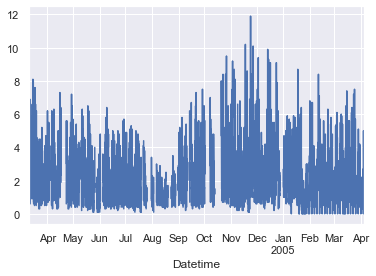

In [68]:
df['CO(GT)'].plot()
#구멍뚫린 부분이 결측치

<AxesSubplot:xlabel='Datetime'>

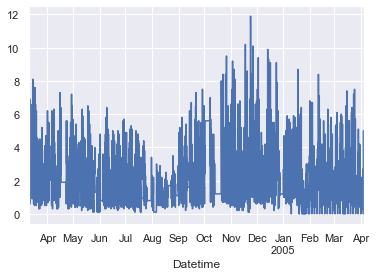

In [86]:
imp_locf=df['CO(GT)'].copy().ffill()
imp_nocb=df['CO(GT)'].copy().bfill()
imp_linear=df['CO(GT)'].copy().interpolate()
imp_mean=df['CO(GT)'].copy().fillna(df['CO(GT)'].mean())
imp_locf.plot()



In [91]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)
imp_knn=df.copy().values
imp_knn=imputer.fit_transform(imp_knn)

imp_df=pd.DataFrame(imp_knn,index=imp_locf.index,columns=df.columns)

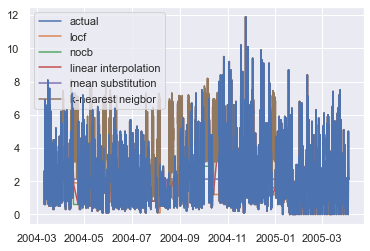

In [93]:
#위의 두방식 비교하기
plt.plot(df['CO(GT)'],label='actual',zorder=10)
plt.plot(imp_locf,label='locf',zorder=1)
plt.plot(imp_nocb,label='nocb',zorder=2) 
plt.plot(imp_linear,label='linear interpolation',zorder=3)    
plt.plot(imp_mean,label='mean substitution',zorder=4)
plt.plot(imp_df['CO(GT)'],label='k-nearest neigbor',zorder=5)

plt.legend(loc='best')
plt.show()

In [97]:
start='2004-07-18'
end='2004-10-20' 


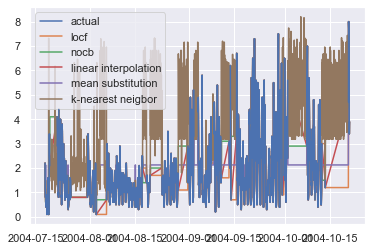

In [99]:
plt.plot(df['CO(GT)'].loc[start:end],label='actual',zorder=10)
plt.plot(imp_locf.loc[start:end],label='locf',zorder=1)
plt.plot(imp_nocb.loc[start:end],label='nocb',zorder=2) 
plt.plot(imp_linear.loc[start:end],label='linear interpolation',zorder=3)    
plt.plot(imp_mean.loc[start:end],label='mean substitution',zorder=4)
plt.plot(imp_df['CO(GT)'].loc[start:end],label='k-nearest neigbor',zorder=5)

plt.legend(loc='best')
plt.show()